# Task 1: Read the Data from Yahoo finance website directly.

In [22]:
# installing yfinance module
!pip install yfinance

In [34]:
!pip install pandas_datareader

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks used for this analysis
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

# Setting up End and Start times for data grab
tech_list = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOGL, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-09-18,140.479996,141.750000,139.220001,139.979996,139.979996,42823500,AMAZON
2023-09-19,138.699997,138.839996,135.559998,137.630005,137.630005,61482500,AMAZON
2023-09-20,138.550003,139.369995,135.199997,135.289993,135.289993,46263700,AMAZON
2023-09-21,131.940002,132.240005,129.309998,129.330002,129.330002,70234800,AMAZON
2023-09-22,131.110001,132.029999,128.520004,129.119995,129.119995,59859500,AMAZON
2023-09-25,129.360001,131.779999,128.770004,131.270004,131.270004,46017800,AMAZON
2023-09-26,130.119995,130.389999,125.279999,125.980003,125.980003,73048200,AMAZON
2023-09-27,125.760002,127.480003,124.129997,125.980003,125.980003,66553400,AMAZON
2023-09-28,124.040001,126.580002,123.040001,125.980003,125.980003,54555000,AMAZON


# Task 2: Cleaning the data

In [3]:
import pandas as pd
# Checking for missing values
print(df.isnull().sum())

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
company_name    0
dtype: int64


In [4]:
df.fillna(method='ffill',inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-10-03,138.210007,143.070007,137.690002,142.449997,141.609894,114311700,APPLE
2022-10-04,145.029999,146.220001,144.259995,146.100006,145.238388,87830100,APPLE
2022-10-05,144.070007,147.380005,143.009995,146.399994,145.536606,79471000,APPLE
2022-10-06,145.809998,147.539993,145.220001,145.429993,144.572342,68402200,APPLE
2022-10-07,142.539993,143.100006,139.449997,140.089996,139.263840,85925600,APPLE
...,...,...,...,...,...,...,...
2023-09-25,129.360001,131.779999,128.770004,131.270004,131.270004,46017800,AMAZON
2023-09-26,130.119995,130.389999,125.279999,125.980003,125.980003,73048200,AMAZON
2023-09-27,125.760002,127.480003,124.129997,125.980003,125.980003,66553400,AMAZON


# Task 3: What was the change in stock price over time

In [6]:
df['Price Change']= df['Close'].diff()
df['Price Change']


Date
2022-10-03         NaN
2022-10-04    3.650009
2022-10-05    0.299988
2022-10-06   -0.970001
2022-10-07   -5.339996
                ...   
2023-09-25    2.150009
2023-09-26   -5.290001
2023-09-27    0.000000
2023-09-28    0.000000
2023-09-29    1.139999
Name: Price Change, Length: 1000, dtype: float64

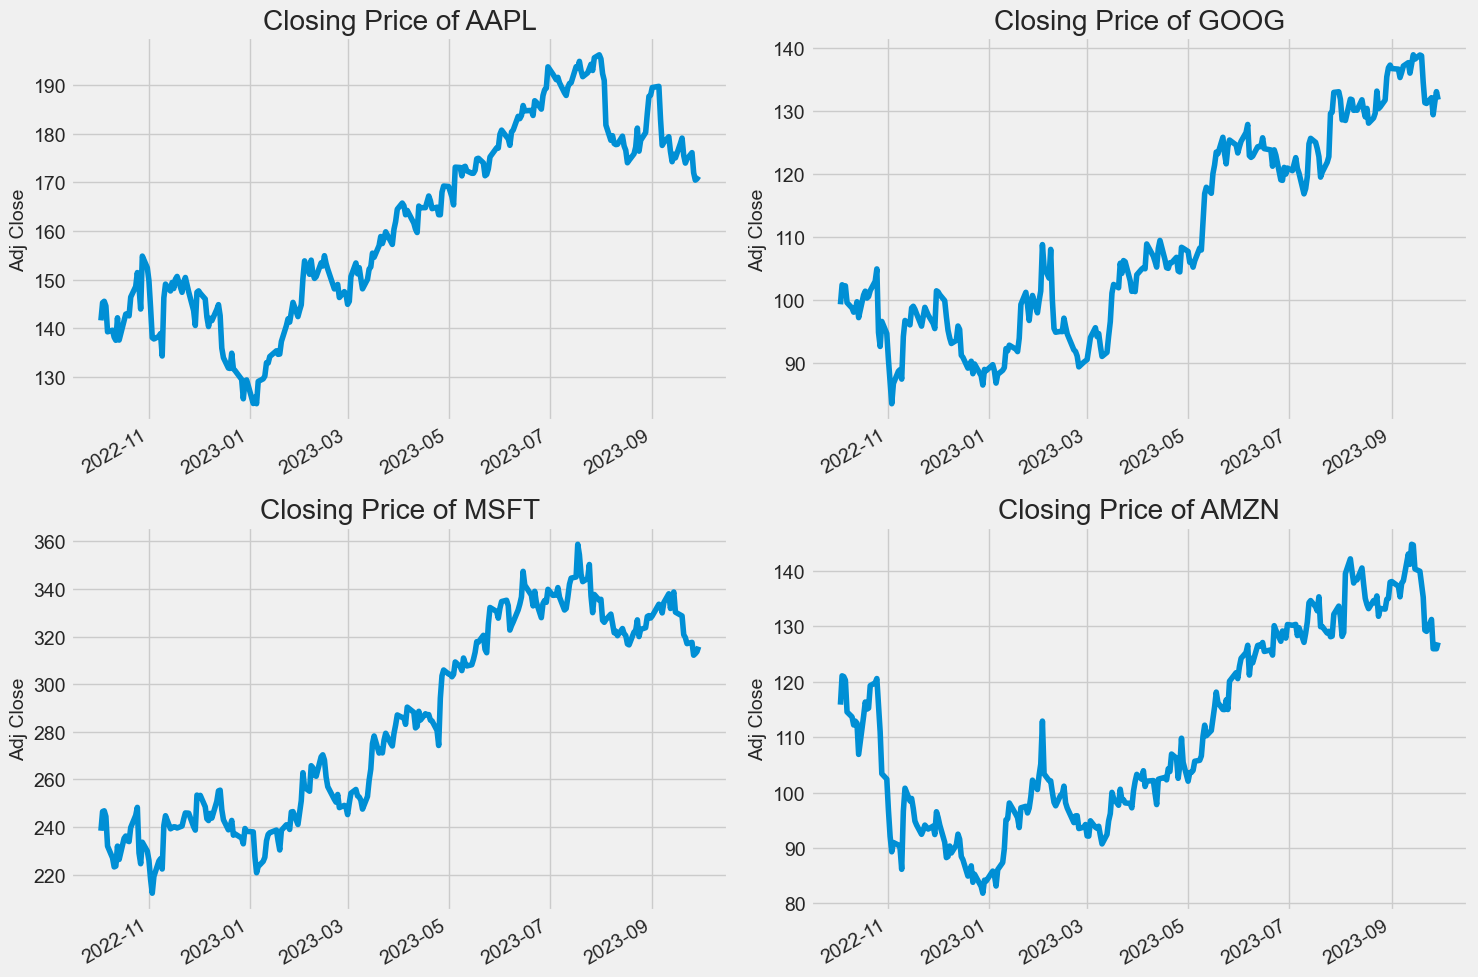

In [7]:
# Showing a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

# Task 4: Visualize the change in stock volume being traded over time

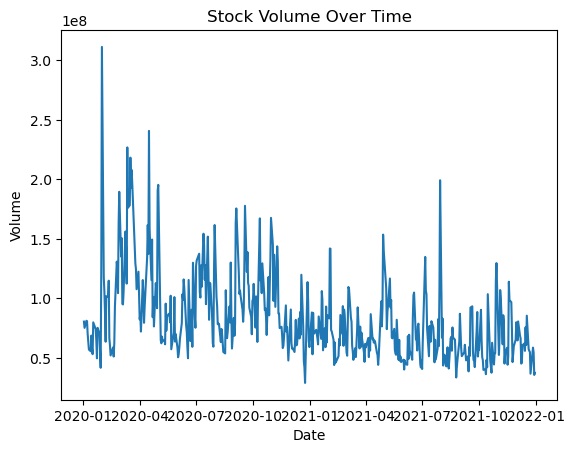

In [16]:
import matplotlib.pyplot as plt

plt.plot(df['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Stock Volume Over Time')
plt.show()

# Task 5: What was the moving average of various stock

In [15]:
# Calculating the moving average  of the various stocks
df['50 - Day MA'] = df['Close'].rolling(window=50).mean()
df['50 - Day MA'] 

Date
2022-10-03           NaN
2022-10-04           NaN
2022-10-05           NaN
2022-10-06           NaN
2022-10-07           NaN
                 ...    
2023-09-25    135.244401
2023-09-26    135.092801
2023-09-27    134.955801
2023-09-28    134.768201
2023-09-29    134.711401
Name: 50 - Day MA, Length: 1000, dtype: float64

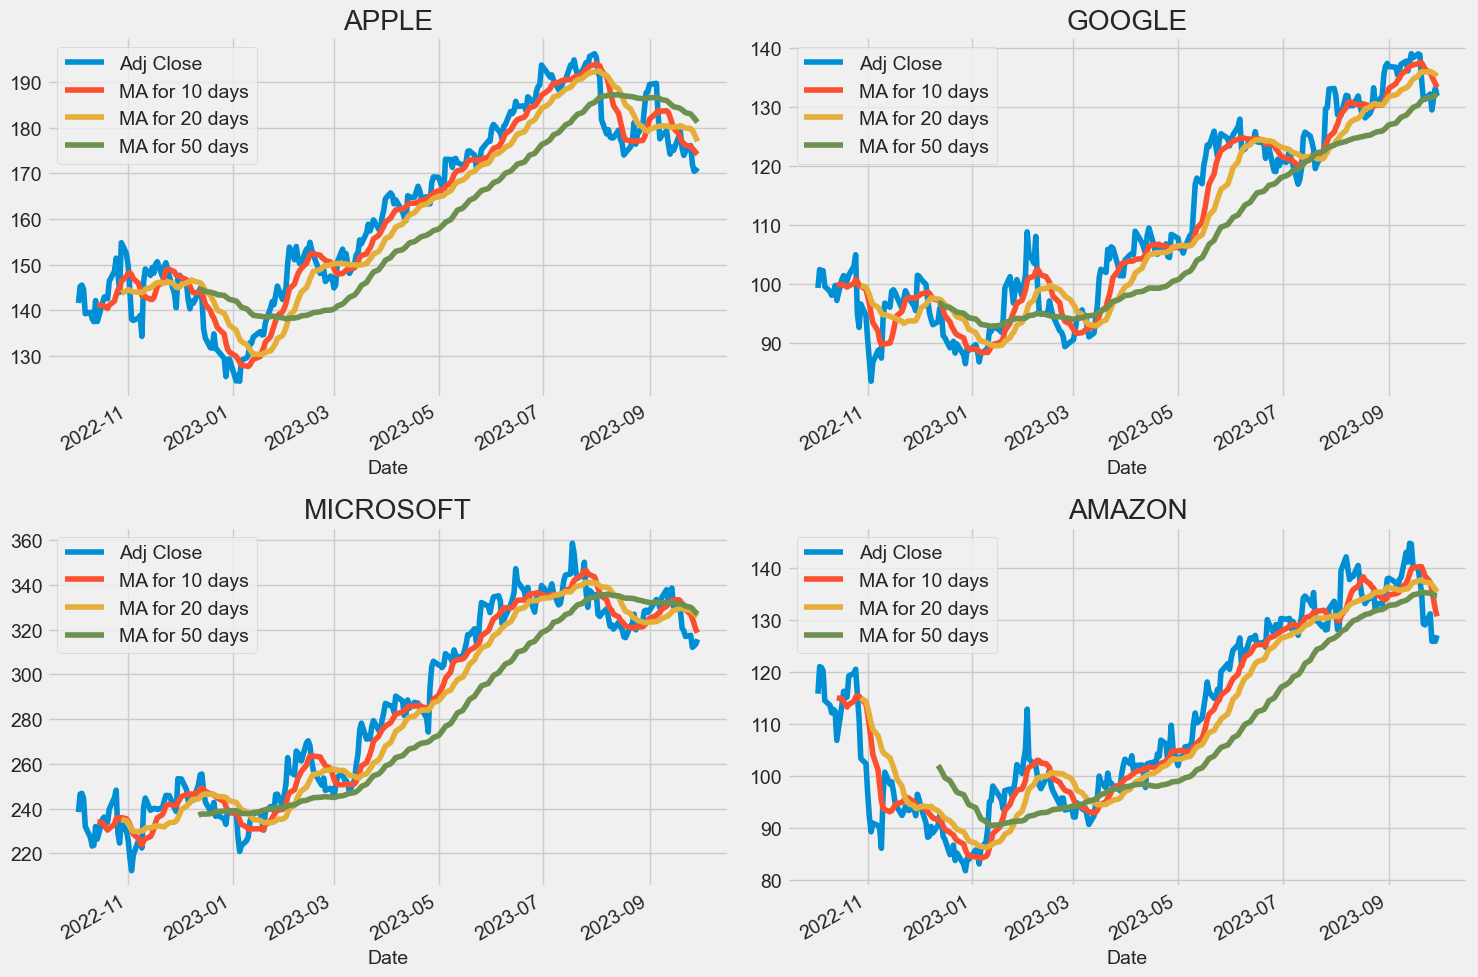

In [8]:
# Showing the moving average on plot
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()


# Task 6: What was the daily return average of a stock 

In [11]:
df['Daily return'] = df['Close'].pct_change()
df['Daily return']

Date
2022-10-03         NaN
2022-10-04    0.025623
2022-10-05    0.002053
2022-10-06   -0.006626
2022-10-07   -0.036719
                ...   
2023-09-25    0.016651
2023-09-26   -0.040299
2023-09-27    0.000000
2023-09-28    0.000000
2023-09-29    0.009049
Name: Daily return, Length: 1000, dtype: float64

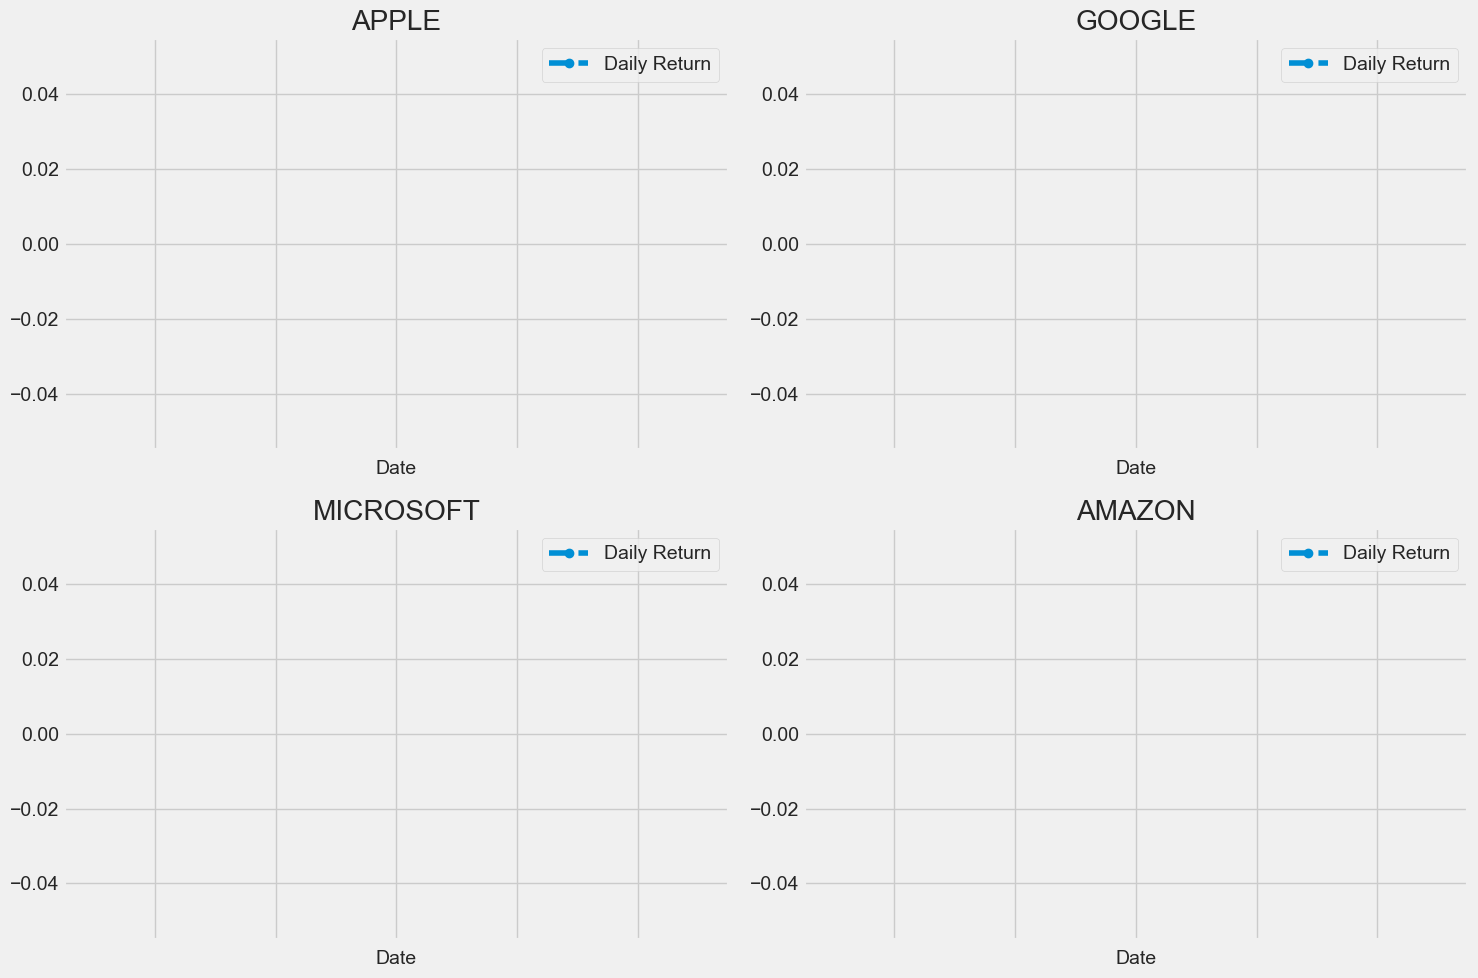

In [46]:
# Using pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plotting the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


# Task 7: Add a new column 'Trend' whose values are based on the 'Daily Return'.

In [14]:
df['Trend'] = ['Up' if x>0 else 'Down' if x<0 else 'Neutral' for x in df['Daily return']]
df['Trend']

Date
2022-10-03    Neutral
2022-10-04         Up
2022-10-05         Up
2022-10-06       Down
2022-10-07       Down
               ...   
2023-09-25         Up
2023-09-26       Down
2023-09-27    Neutral
2023-09-28    Neutral
2023-09-29         Up
Name: Trend, Length: 1000, dtype: object

# Task 8: Visualize the trend frequency through a pie chart 

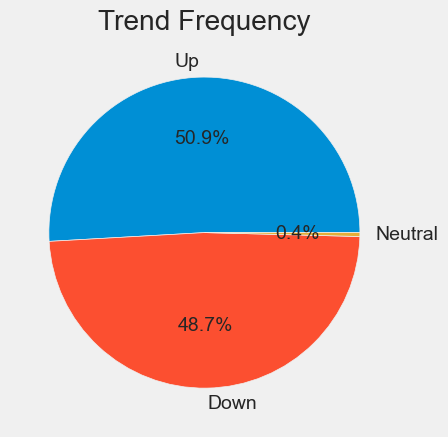

In [16]:
trend_counts = df['Trend'].value_counts()
plt.pie(trend_counts,labels = trend_counts.index,autopct='%1.1f%%')
plt.title('Trend Frequency')
plt.show()

# Task 9: What was the correlation between the daily returns of different stock?

In [17]:
# Grabbing all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Making a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-10-03,NaN,NaN,NaN,NaN
2022-10-04,0.025623,0.044960,0.031319,0.033812
2022-10-05,0.002053,-0.001156,-0.001855,0.001286
2022-10-06,-0.006626,-0.005374,0.000196,-0.009671
2022-10-07,-0.036719,-0.047714,-0.026115,-0.050853


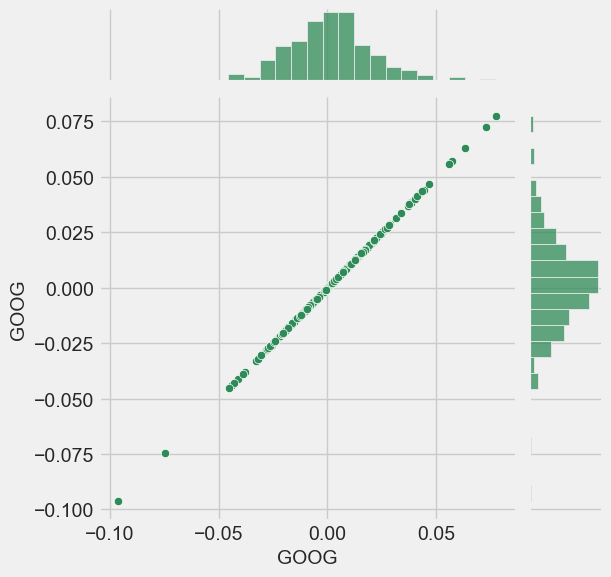

In [18]:
# Comparing Google to itself 
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

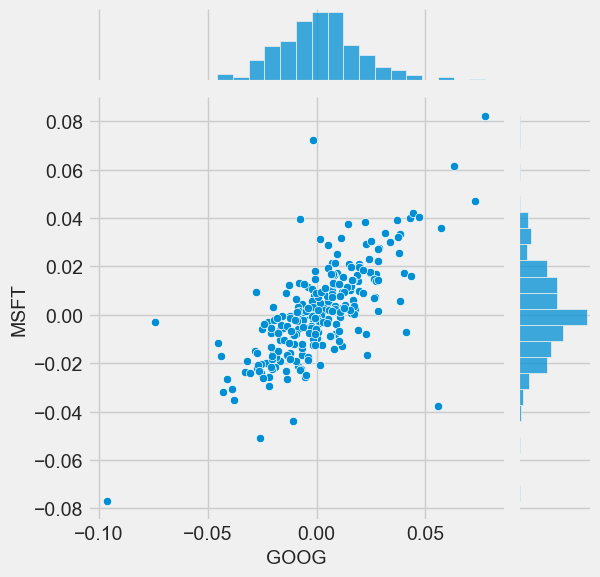

In [19]:
# Using joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

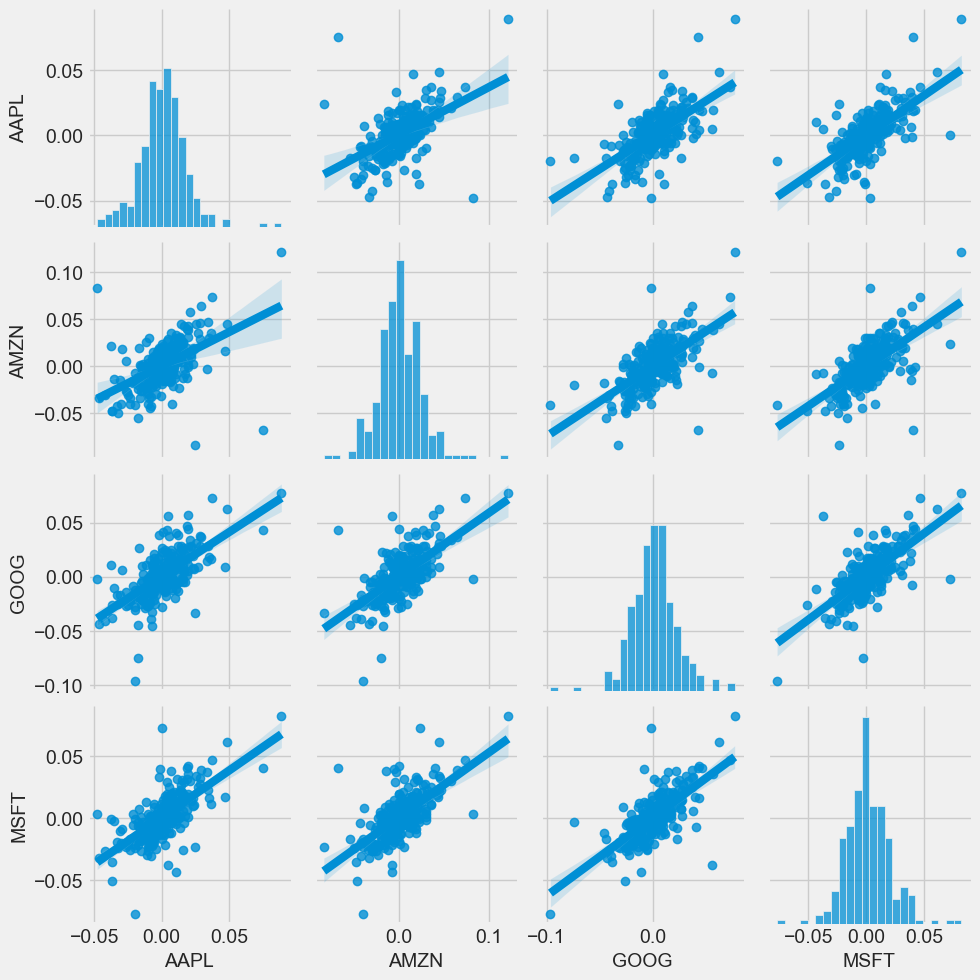

In [20]:
# Calling pairplot on the DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Text(0.5, 1.0, 'Correlation of stock closing price')

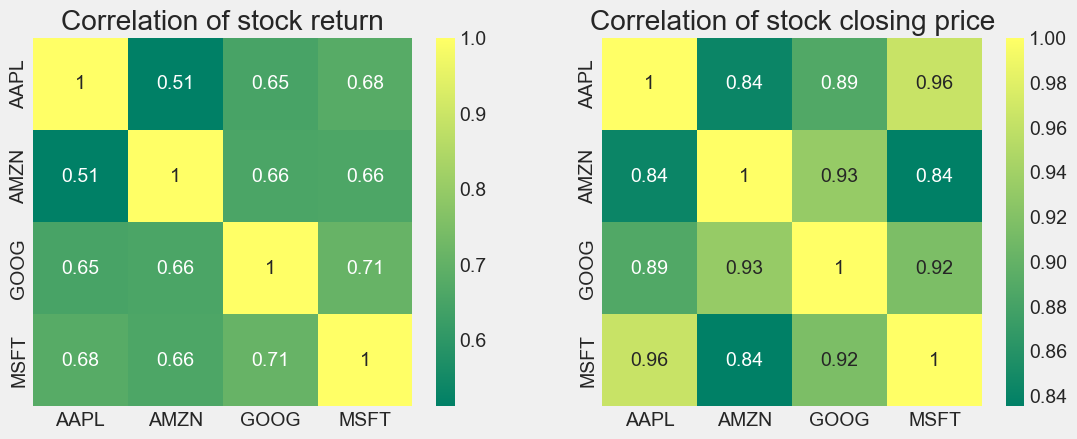

In [21]:
# Using correlation plot to get actual numerical values for the correlation between the stocks' daily return values. 

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')
